还没有去掉守门员

In [1]:
import pandas as pd
data = pd.read_csv('Player_Attributes.csv')
data = data.drop(['Unnamed: 0','id','player_api_id','date','preferred_foot','potential','attacking_work_rate','defensive_work_rate',
    'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1)
data.head()

,player_fifa_api_id,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,218353,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,218353,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,218353,62.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,218353,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,218353,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [2]:
data2 = data.groupby('player_fifa_api_id').mean()
data2.dropna(inplace=True)
data2.head()

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
player_fifa_api_id,,,,,,,,,,,,,,,,,,,,,
2,70.600000,74.100000,48.033333,62.800000,71.200000,56.566667,66.600000,67.733333,60.600,69.200000,...,71.366667,65.200000,76.533333,74.066667,65.100000,55.766667,59.766667,71.466667,74.000000,72.833333
6,72.125000,18.000000,18.000000,24.000000,28.750000,6.500000,17.000000,7.250000,15.375,55.250000,...,60.750000,14.750000,35.000000,36.750000,30.375000,42.000000,25.250000,24.750000,24.125000,17.000000
11,67.352941,63.588235,54.352941,60.882353,71.882353,64.470588,67.117647,69.058824,51.000,66.764706,...,75.176471,70.411765,62.058824,59.882353,63.117647,68.882353,68.117647,45.117647,49.588235,58.941176
16,74.125000,74.187500,73.937500,64.000000,68.750000,72.625000,76.125000,77.562500,76.750,56.437500,...,70.562500,73.937500,69.062500,34.000000,75.812500,59.875000,75.750000,27.062500,31.062500,21.000000
27,76.500000,80.933333,69.833333,49.833333,80.133333,76.833333,82.333333,83.333333,76.800,68.433333,...,60.633333,73.233333,68.200000,44.666667,73.933333,81.366667,67.700000,37.133333,36.200000,29.333333


In [3]:
from sklearn import preprocessing
zscore = preprocessing.StandardScaler()

# zscore标准化
zscore = zscore.fit_transform(data2)

data2 = pd.DataFrame(zscore,index=data2.index,columns=data2.columns)

data2

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
player_fifa_api_id,,,,,,,,,,,,,,,,,,,,,
2,0.602098,1.306516,0.008818,0.432357,0.797717,0.545291,0.564559,1.000146,0.815530,1.078786,...,0.428943,0.828987,1.145667,1.332692,0.687303,-0.007179,0.461004,1.264392,1.208921,1.248308
6,0.849130,-2.154882,-1.645212,-2.050022,-2.351650,-2.342041,-2.370942,-2.494400,-1.955118,0.008139,...,-0.535431,-2.085814,-1.639400,-0.797776,-1.391474,-0.987356,-2.034372,-1.065654,-1.239670,-1.463489
11,0.076115,0.657935,0.356858,0.309669,0.848341,1.001109,0.595195,1.076728,0.227399,0.891880,...,0.775010,1.130102,0.175062,0.522887,0.568631,0.926649,1.064737,-0.049795,0.010436,0.573573
16,1.173105,1.311915,1.435442,0.509132,0.615951,1.471372,1.128282,1.568045,1.804937,0.099279,...,0.355896,1.333805,0.644702,-0.954778,1.328596,0.285332,1.616517,-0.950315,-0.899077,-1.269211
27,1.557826,1.728136,1.209412,-0.397235,1.460481,1.714065,1.495713,1.901467,1.808000,1.019945,...,-0.546029,1.293122,0.586866,-0.345801,1.216102,1.815524,1.034543,-0.448021,-0.646853,-0.864465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233885,-2.410872,-1.476177,-1.645212,-0.258614,-2.184723,-1.217481,-1.897474,-1.468858,-1.242928,-2.160015,...,-0.331051,-1.782489,-1.170006,0.187054,-1.593515,-1.699350,-1.329498,0.143842,0.325219,0.236444
233911,-1.438946,-0.118766,-1.259700,-0.962381,-0.700922,-1.448160,-0.713804,-1.006642,-0.997874,-2.236764,...,-0.966902,-1.609161,-0.633557,-0.098404,-0.815283,-1.628150,-1.329498,0.492975,0.570692,0.867847
233930,-1.276959,0.128036,-1.094481,-0.386572,-1.887963,-1.044472,0.588232,-0.775534,-0.507765,-1.546025,...,-1.875260,-1.378057,-0.030051,0.129962,0.082677,-1.129755,-0.751139,0.443099,0.963448,0.722138


In [4]:
newdata = data2.reset_index(drop=True)

In [34]:
newdata[['crossing','short_passing','volleys','dribbling','heading_accuracy','ball_control','standing_tackle','sliding_tackle','curve']].corr(method='pearson')

,crossing,short_passing,volleys,dribbling,heading_accuracy,ball_control,standing_tackle,sliding_tackle,curve
crossing,1.000000,0.809609,0.652612,0.822206,0.388226,0.828611,0.299430,0.295682,0.811198
short_passing,0.809609,1.000000,0.659886,0.799795,0.574950,0.908055,0.425680,0.398258,0.760691
volleys,0.652612,0.659886,1.000000,0.807139,0.416241,0.772147,-0.123807,-0.142716,0.762577
dribbling,0.822206,0.799795,0.807139,1.000000,0.417413,0.913562,0.055158,0.042781,0.828359
heading_accuracy,0.388226,0.574950,0.416241,0.417413,1.000000,0.585100,0.485110,0.449663,0.349896
ball_control,0.828611,0.908055,0.772147,0.913562,0.585100,1.000000,0.257638,0.232628,0.822883
standing_tackle,0.299430,0.425680,-0.123807,0.055158,0.485110,0.257638,1.000000,0.970607,0.100809
sliding_tackle,0.295682,0.398258,-0.142716,0.042781,0.449663,0.232628,0.970607,1.000000,0.087311
curve,0.811198,0.760691,0.762577,0.828359,0.349896,0.822883,0.100809,0.087311,1.000000


In [5]:
data2['player_fifa_api_id'] = data2.index
data2['Technical'] = (data2['crossing']+data2['short_passing']+data2['volleys']+data2['dribbling']
+data2['heading_accuracy']+data2['ball_control']+data2['standing_tackle']
+data2['sliding_tackle']+data2['curve'])/10

data2['Offense'] = (data2['shot_power']+data2['free_kick_accuracy']+data2['acceleration']+
data2['finishing']+data2['long_shots']+data2['penalties'])/6

data2['Defense'] = (data2['interceptions']+data2['marking'])/2

data2['Physical'] = (data2['sprint_speed']+data2['agility']+data2['reactions']+
data2['balance']+data2['jumping']+data2['stamina']+data2['strength'])/7

data2['Mental'] = (data2['positioning']+data2['aggression']+data2['vision'])/3

data3 = data2.loc[:,['player_fifa_api_id','Technical','Offense','Defense','Physical','Mental']]
data3 = data3.reset_index(drop=True)
data3.head()

,player_fifa_api_id,Technical,Offense,Defense,Physical,Mental
0,2,0.773032,0.552498,1.298542,0.548055,0.608597
1,6,-1.948045,-1.815660,-0.931715,-0.546696,-1.339410
2,11,0.584366,0.541074,0.236546,0.119035,0.556781
3,16,0.574445,1.341737,-0.952547,0.778597,0.752876
4,27,0.791549,1.010396,-0.396911,-0.014219,1.206164


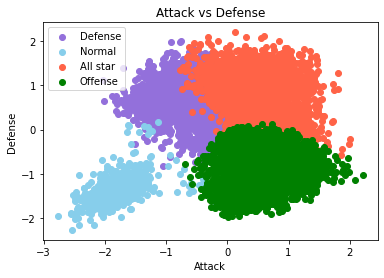

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = data3[['Technical','Offense','Defense','Physical','Mental']]
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)   # 模型创建
y_kmeans = kmeans_model.fit_predict(x)  # 进行聚类处理,这里数据已经是array形式
data3['聚类结果'] = kmeans_model.labels_

colors_list = ['mediumpurple', 'skyblue', 'tomato','green']
labels_list = ['Defense', 'Normal', 'All star','Offense']
# markers_list = ['o', '*', 'D']  # 分别为圆、星型、菱形

# 进行x[y_kmeans==i,0]
for i in range(4):
    my_members = kmeans_model.labels_ == i
    plt.scatter(x.values[my_members, 1], x.values[my_members, 2], c=colors_list[i], label=labels_list[i])
plt.title('Attack vs Defense')
plt.legend()
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

In [7]:
data3

,player_fifa_api_id,Technical,Offense,Defense,Physical,Mental,聚类结果
0,2,0.773032,0.552498,1.298542,0.548055,0.608597,2
1,6,-1.948045,-1.815660,-0.931715,-0.546696,-1.339410,1
2,11,0.584366,0.541074,0.236546,0.119035,0.556781,2
3,16,0.574445,1.341737,-0.952547,0.778597,0.752876,3
4,27,0.791549,1.010396,-0.396911,-0.014219,1.206164,3
...,...,...,...,...,...,...,...
10577,233885,-0.994426,-1.238692,0.165448,-0.600755,-1.487624,0
10578,233911,-0.469243,-1.057774,0.197285,-0.259719,-1.025664,0
10579,233930,-0.211919,-0.806068,0.286530,-0.235317,-0.359043,0
10580,233969,-0.337557,-1.013464,0.543127,-0.760962,-0.949669,0


In [8]:
kmeans_model.cluster_centers_+2

array([[1.89418311, 1.38261753, 2.68037317, 1.78711247, 1.67793651],
       [0.19915917, 0.19658667, 0.63611726, 0.87827001, 0.23562879],
       [2.53056554, 2.46078993, 2.8054647 , 2.4007867 , 2.64580432],
       [2.09567217, 2.57920016, 1.09208704, 2.11922634, 2.16350141]])

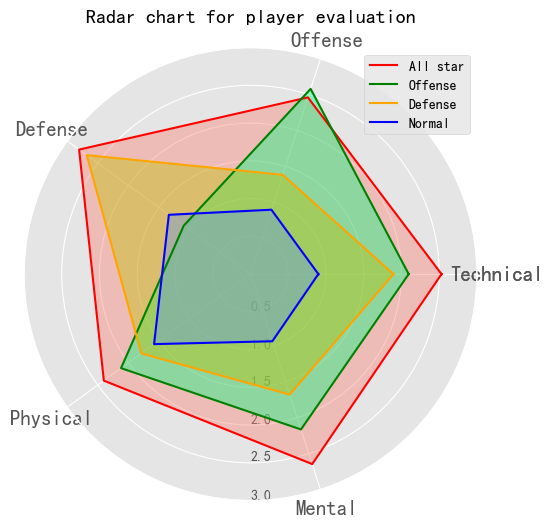

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.style.use('ggplot')  # 设置ggplot样式

# 原始数据集并获取数据集长度
results = [{"Technical": 1.89418311, "Offense": 1.38261753, "Defense": 2.68037317, "Physical": 1.78711247, "Mental": 1.67793651},
           {"Technical": 1.19915917-0.3, "Offense": 1.19658667-0.3, "Defense": 1.63611726-0.3, "Physical": 1.87827001-0.3, "Mental": 1.23562879-0.3},
           {"Technical": 2.53056554, "Offense": 2.46078993, "Defense": 2.8054647, "Physical": 2.4007867, "Mental": 2.64580432},
          {"Technical": 2.09567217, "Offense": 2.57920016, "Defense": 1.09208704, "Physical": 2.11922634, "Mental": 2.16350141}]
data_length = len(results[0])

angles = np.linspace(0, 2 * np.pi, data_length, endpoint=False)  # 将极坐标根据数据长度进行等分

# 分离属性字段和数据
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]

# 使雷达图数据封闭
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
score_Harry = np.concatenate((score[0], [score[0][0]]))
score_Son = np.concatenate((score[1], [score[1][0]]))
score_Tobi = np.concatenate((score[2], [score[2][0]]))
score_qq = np.concatenate((score[3], [score[3][0]]))

# 设置图形的大小
fig = plt.figure(figsize=(8, 6), dpi=100)

# 新建一个子图
ax = plt.subplot(111, polar=True)

# 绘制雷达图并填充颜色
ax.plot(angles, score_Tobi, color='r')
ax.fill(angles, score_Tobi, 'salmon', alpha=0.4)
ax.plot(angles, score_qq, color='g')
ax.fill(angles, score_qq, 'springgreen', alpha=0.4)
ax.plot(angles, score_Harry, color='orange')
ax.fill(angles, score_Harry, 'y', alpha=0.4)
ax.plot(angles, score_Son, color='b')
ax.fill(angles, score_Son, 'cornflowerblue', alpha=0.4)

# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles * 180 / np.pi, labels, fontsize=15)

ax.set_theta_zero_location('E')  # 设置0度坐标轴起始位置，东西南北

ax.set_rlim(0, 3)  # 设置雷达图的坐标刻度范围

ax.set_rlabel_position(270)  # 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_title("Radar chart for player evaluation")
plt.legend(["All star", "Offense", "Defense",'Normal'])

plt.show()

In [10]:
len(data3)

10582

In [11]:
import networkx as nx
G = nx.DiGraph()
# nodes = [i for i in range(100)]
# G.add_nodes_from(nodes) 
# matrix = np.zeros(shape=(100,100))
# matrix=[]
for i in range(100):
    for j in range(i+1,100):
        t = data3.loc[i,'Technical']-data3.loc[j,'Technical']
        o = data3.loc[i,'Offense']-data3.loc[j,'Offense']
        d = data3.loc[i,'Defense']-data3.loc[j,'Defense']
        p = data3.loc[i,'Physical']-data3.loc[j,'Physical']
        m = data3.loc[i,'Mental']-data3.loc[j,'Mental']
        pos = 0
        neg = 0
        if t>=0:
            pos+=t
        else:
            neg+=-1*t
        if o>=0:
            pos+=o
        else:
            neg+=-1*o
        if d>=0:
            pos+=d
        else:
            neg+=-1*d
        if p>=0:
            pos+=p
        else:
            neg+=-1*p
        if m>=0:
            pos+=m
        else:
            neg+=-1*m
#         if pos > 0:
#             matrix.append([i,j,pos])
#         if neg > 0:
#             matrix.append([j,i,neg])
# matrix
#         matrix[i][j]=pos
#         matrix[j][i]=neg
        G.add_edge(i, j, weight = pos)
        G.add_edge(j, i, weight = neg)
# nx.draw(G,node_size = 30, with_label = False)

In [12]:
# df = pd.DataFrame(matrix,columns=['Source','Target','Weight'])
# df.to_csv('data.csv',index=False)

In [13]:
#nx.write_gexf(G,'test.gexf') # 将图存为gexf文件，进而使用Gephi可视化

In [14]:
pagerank = nx.pagerank(G)
x = list(pagerank.values())
x = [-1*item+0.01 for item in x]
x= np.array(x).reshape(-1, 1)
y = np.array(newdata.loc[:99,'overall_rating']).reshape(-1, 1)

In [15]:
len(x)

100

Text(0.5, 1.0, 'pagerank&overrating')

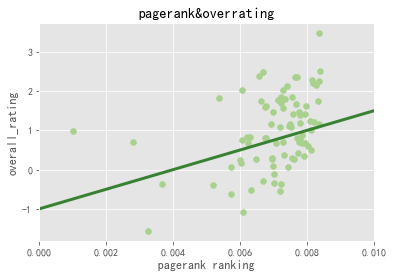

In [32]:
import sklearn.linear_model as LM
# modelLR = LM.LinearRegression()
# modelLR.fit(x,y)
# plt.plot(x,modelLR.predict(x),linewidth=0.8)
a = [0, 0.010]
b = [-1, 1.5]
plt.plot(a, b, linewidth=3,color='#388132')
plt.scatter(x,y,color='#A9D18E')
plt.xlim(0,0.01)
plt.xlabel('pagerank ranking')
plt.ylabel('overall_rating')
plt.title('pagerank&overrating')